# Task 4.10 - Part 1

## Table of Contents:

#### 1: Library and Data Import

#### 2: Security Considerations

#### 3: Regional Segmentation 
* Create regions

#### 4: Exclusion Flag for Low Activity Customers

#### 5: Create Customer Variables and Profiles

Customer variables:
* Age group varible
* Income group variable
* Parental status variable

#### 6: Customer Variable Visualizations

#### 7: Customer Variable Aggregations

#### 8: Key Questions and Analysis (continued on second notebook)


### 1. Library and Data Import

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create path to folder
path = r'/Users/caitlin/Documents 2/Instacart Basket Analysis 12.2021'

In [3]:
path

'/Users/caitlin/Documents 2/Instacart Basket Analysis 12.2021'

In [5]:
# Import data file
master_df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'master_df_2.pkl'))

In [5]:
# Examine shape
master_df.shape

(32399727, 33)

In [6]:
# Show all columns
pd.options.display.max_columns = None

In [7]:
# Show all rows
pd.options.display.max_rows = None

In [8]:
# Check import
master_df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,single_order,product_id,add_to_cart_order,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,order_avg,spender_type,median_days_prior_order,customer_frequency,customer_first_name,customer_surname,customer_gender,customer_state,customer_age,date_customer_joined,customer_number_dependents,customer_family_status,customer_income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Busiest Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,False,196,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Moderate Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,False,196,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Busiest Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,False,196,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Moderate Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,False,196,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Busiest Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


### 2. Security considerations

Most of the customer data is PII and has implications. First and last name are PII, but are not necessarily high risk. When combined with things like age, state, and gender, they have the potential to be higher risk in the case of a data breach. Therefore, name should only be used if there is a strong business case for doing so and ideally never combined with other data. Income does not present a risk, but customers furnish that information to Instacart so it should be handled with care and not widely shared in connection with individual customers.

### 3. Regional Segmentation 

#### Create customer regions

In [9]:
# Use value count to see counts of each state
master_df['customer_state'].value_counts(dropna = False)

Pennsylvania            667007
California              659695
Rhode Island            656777
Georgia                 656249
New Mexico              654400
Arizona                 653864
North Carolina          651790
Oklahoma                651661
Alaska                  648451
Minnesota               647738
Massachusetts           646275
Wyoming                 644191
Virginia                641280
Missouri                640576
Texas                   640285
Colorado                639173
Maine                   638479
North Dakota            638391
Alabama                 637863
Kansas                  637418
Louisiana               637414
Delaware                636906
South Carolina          636677
Oregon                  636332
Arkansas                636065
Nevada                  636034
New York                635912
Montana                 635181
South Dakota            633649
Illinois                632928
Hawaii                  632786
Washington              632722
Mississi

All customer state values are within the Census Bureau assigned regions - ie: they are all states, no territories or outside the US.

In [10]:
# Create new region columns
master_df.loc[(master_df['customer_state'].isin(["Maine", "New Hampshire", "Vermont", "Massachusetts", "Rhode Island", "Connecticut", "New York", "Pennsylvania", "New Jersey"]), 'customer_region')] = 'Northeast'
master_df.loc[(master_df['customer_state'].isin(["Wisconsin", "Michigan", "Illinois", "Indiana", "Ohio", "North Dakota", "South Dakota", "Nebraska", "Kansas", "Minnesota", "Iowa", "Missouri"]), 'customer_region')] = 'Midwest'
master_df.loc[(master_df['customer_state'].isin(["Delaware", "Maryland", "District of Columbia", "Virginia", "West Virginia", "North Carolina", "South Carolina", "Georgia", "Florida", "Kentucky", "Tennessee", "Mississippi", "Alabama", "Oklahoma", "Texas", "Arkansas", "Louisiana"]), 'customer_region')] = 'South'
master_df.loc[(master_df['customer_state'].isin(["Idaho", "Montana", "Wyoming", "Nevada", "Utah", "Colorado", "Arizona", "New Mexico", "Alaska", "Washington", "Oregon", "California", "Hawaii"]), 'customer_region')] = 'West'

Note: Regions determined by US Census Bureau designated areas.

In [11]:
# Check creation of new columns
master_df[['customer_state','customer_region']].head(100)

,customer_state,customer_region
0,Alabama,South
1,Alabama,South
2,Alabama,South
3,Alabama,South
4,Alabama,South
5,Alabama,South
6,Alabama,South
7,Alabama,South
8,Alabama,South
9,Alabama,South


In [12]:
# Confirm all column headers
master_df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,single_order,product_id,add_to_cart_order,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,order_avg,spender_type,median_days_prior_order,customer_frequency,customer_first_name,customer_surname,customer_gender,customer_state,customer_age,date_customer_joined,customer_number_dependents,customer_family_status,customer_income,_merge,customer_region
0,2539329,1,1,2,8,NaN,True,196,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Busiest Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,2398795,1,2,3,7,15.0,False,196,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Moderate Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,473747,1,3,3,12,21.0,False,196,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Busiest Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
3,2254736,1,4,4,7,29.0,False,196,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Moderate Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
4,431534,1,5,4,15,28.0,False,196,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Busiest Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South


In [13]:
# Check all values assigned
master_df['customer_region'].value_counts(dropna = False)

South        10790091
West          8291679
Midwest       7596065
Northeast     5721892
Name: customer_region, dtype: int64

In [14]:
# Check for nulls
master_df['customer_region'].isnull().sum()

0

There are no nulls, so all customers have been assigned to a region.

##### Spending habits across regions: Please see below under Question 8.

### 4. Exclusion Flag for Low Activity Customers

In [15]:
# Create exclusion flag for customers with fewer than 5 orders
master_df.loc[master_df['max_order'] < 5, 'customer_activity'] = "low activity customer"
master_df.loc[master_df['max_order'] >= 5, 'customer_activity'] = "regular activity customer"

In [16]:
# Check creation of new columns
master_df[['max_order','customer_activity']].head(100)

,max_order,customer_activity
0,10,regular activity customer
1,10,regular activity customer
2,10,regular activity customer
3,10,regular activity customer
4,10,regular activity customer
5,10,regular activity customer
6,10,regular activity customer
7,10,regular activity customer
8,10,regular activity customer
9,10,regular activity customer


In [17]:
# Check count of new values
master_df['customer_activity'].value_counts(dropna = False)

regular activity customer    30959687
low activity customer         1440040
Name: customer_activity, dtype: int64

In [18]:
# Create subset of low activity customers
master_df_low_activity = master_df[master_df['customer_activity'] == "low activity customer"]

In [19]:
# Check number of values
master_df_low_activity.shape

(1440040, 35)

The number of values in the subset is equal, so the new subset includes all low activity customers.

In [20]:
# Check number of orders for low activity customers to ensure they fit criterion
master_df_low_activity['max_order'].value_counts(dropna = False)

4    753414
3    686620
2         6
Name: max_order, dtype: int64

The value count confirms that all customers in the subset have placed fewer than 5 orders so can be dropped.

In [21]:
# Drop values from dataframe
master_df_new = master_df[master_df['customer_activity'] == "regular activity customer"]

In [22]:
# Check shape of new dataframe
master_df_new.shape

(30959687, 35)

In [23]:
# Check that there are no orders under 5
master_df_new['max_order'].agg({'mean', 'min', 'max'})

max     99.000000
min      5.000000
mean    34.426205
Name: max_order, dtype: float64

The shape of the new dataframe matches the value of regular activity customers and there are no orders under 5, so the new df is correct.

In [24]:
# Export low activity customer subset
master_df_low_activity.to_pickle(os.path.join(path,'02 Data','Prepared Data','master_df_low_activity_customers.pkl'))

In [25]:
# Export high activity customer subset
master_df_new.to_pickle(os.path.join(path,'02 Data','Prepared Data','master_df_high_activity_customers.pkl'))

Both are successfully downloaded into the prepared data folder

### 5. Create Customer Variables and Profiles

#### Customer Variables

 Create new variable based on age group:

In [26]:
# Determine range of customer age column
master_df['customer_age'].agg({'mean', 'min', 'max'})

max     81.000000
min     18.000000
mean    49.465275
Name: customer_age, dtype: float64

In [27]:
# Create age group variables
result = []

for value in master_df["customer_age"]:
    if value <= 20:
        result.append('18-20')
    elif (value > 20) and (value <= 30):
        result.append('21-30')
    elif (value > 30) and (value <= 40):
        result.append('31-40')
    elif (value > 40) and (value <= 50):
        result.append('41-50')
    elif (value > 50) and (value <= 60):
        result.append('51-60')
    elif (value > 60) and (value <= 70):
        result.append('61-70')
    elif (value > 70):
        result.append('70+')
    else:
        result.append('Not in age group')

In [28]:
# Create new column for age groups
master_df['age_group'] = result

In [29]:
# Check age group variable value counts
master_df['age_group'].value_counts(dropna = False).sort_index()

18-20    1522747
21-30    5075528
31-40    5069934
41-50    5091358
51-60    5059004
61-70    5003863
70+      5577293
Name: age_group, dtype: int64

In [30]:
# Check creation of column
master_df[['age_group','customer_age']].head(100)

,age_group,customer_age
0,31-40,31
1,31-40,31
2,31-40,31
3,31-40,31
4,31-40,31
5,31-40,31
6,31-40,31
7,31-40,31
8,31-40,31
9,31-40,31


Create new variable based on income:

In [31]:
# Determine range of income column
master_df['customer_income'].agg({'mean', 'min', 'max'})

max     593901.000000
min      25903.000000
mean     99416.845311
Name: customer_income, dtype: float64

In [32]:
# Create new variable for customer salary groups
result_2 = []

for value in master_df["customer_income"]:
    if (value > 20000) and (value <= 50000):
        result_2.append('020000 - 050000')
    elif (value > 50000) and (value <= 75000):
        result_2.append('050000 - 075000')
    elif (value > 75000) and (value <= 100000):
        result_2.append('075000 - 100000')
    elif (value > 100000) and (value <= 125000):
        result_2.append('100000 - 125000')
    elif (value > 125000) and (value <= 150000):
        result_2.append('125000 - 150000')
    elif (value > 150000) and (value <= 300000):
        result_2.append('150000 - 300000')
    elif (value > 300000) and (value <= 600000):
        result_2.append('300000 - 600000')
    else:
        result_2.append('Not in income group')

In [33]:
# Create new column for income groups
master_df['income_group'] = result_2

In [34]:
# Check value counts of new column
master_df['income_group'].value_counts(dropna = False).sort_index()

020000 - 050000    3594083
050000 - 075000    6848731
075000 - 100000    7147560
100000 - 125000    6182785
125000 - 150000    4579594
150000 - 300000    3946376
300000 - 600000     100598
Name: income_group, dtype: int64

In [35]:
# Check creation of column
master_df[['income_group','customer_income']].head(100)

,income_group,customer_income
0,020000 - 050000,40423
1,020000 - 050000,40423
2,020000 - 050000,40423
3,020000 - 050000,40423
4,020000 - 050000,40423
5,020000 - 050000,40423
6,020000 - 050000,40423
7,020000 - 050000,40423
8,020000 - 050000,40423
9,020000 - 050000,40423


Create new variable based on family status:

In [36]:
# Check value counts of dependents variable
master_df['customer_number_dependents'].value_counts(dropna = False).sort_index()

0    8096275
1    8079881
2    8089749
3    8133822
Name: customer_number_dependents, dtype: int64

In [37]:
# Create exclusion flag for customers without children
master_df.loc[master_df['customer_number_dependents'] == 0, 'parental_status'] = "non-parent"
master_df.loc[master_df['customer_number_dependents'] >= 1, 'parental_status'] = "parent"

In [38]:
# Check value counts of parent varible
master_df['parental_status'].value_counts(dropna = False)

parent        24303452
non-parent     8096275
Name: parental_status, dtype: int64

In [39]:
# Check creation of new columns
master_df[['customer_number_dependents','parental_status']].head(100)

,customer_number_dependents,parental_status
0,3,parent
1,3,parent
2,3,parent
3,3,parent
4,3,parent
5,3,parent
6,3,parent
7,3,parent
8,3,parent
9,3,parent


Marital status variable (only for reference, not changing):

In [40]:
# Check value counts of marriage status variable
master_df['customer_family_status'].value_counts(dropna = False).sort_index()

divorced/widowed                     2771355
living with parents and siblings     1550402
married                             22753050
single                               5324920
Name: customer_family_status, dtype: int64

Department information - this will require downloading the department dataframe

In [43]:
# Importing departments data from CSV filedep
dept_df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'), index_col = False)

In [44]:
dept_df.head()

,department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,bulk,personal care,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [45]:
# Transposing data in departments
dept_df.T

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [46]:
# Create new column in master dataframe to identify the columns more easily
master_df.loc[master_df['department_id'] == 1, 'department_name'] = "frozen"
master_df.loc[master_df['department_id'] == 2, 'department_name'] = "other"
master_df.loc[master_df['department_id'] == 3, 'department_name'] = "bakery"
master_df.loc[master_df['department_id'] == 4, 'department_name'] = "produce"
master_df.loc[master_df['department_id'] == 5, 'department_name'] = "alcohol"
master_df.loc[master_df['department_id'] == 6, 'department_name'] = "international"
master_df.loc[master_df['department_id'] == 7, 'department_name'] = "beverages"
master_df.loc[master_df['department_id'] == 8, 'department_name'] = "pets"
master_df.loc[master_df['department_id'] == 9, 'department_name'] = "dry goods pasta"
master_df.loc[master_df['department_id'] == 10, 'department_name'] = "bulk"
master_df.loc[master_df['department_id'] == 11, 'department_name'] = "personal care"
master_df.loc[master_df['department_id'] == 12, 'department_name'] = "meat seafood"
master_df.loc[master_df['department_id'] == 13, 'department_name'] = "pantry"
master_df.loc[master_df['department_id'] == 14, 'department_name'] = "breakfast"
master_df.loc[master_df['department_id'] == 15, 'department_name'] = "canned goods"
master_df.loc[master_df['department_id'] == 16, 'department_name'] = "dairy eggs"
master_df.loc[master_df['department_id'] == 17, 'department_name'] = "household"
master_df.loc[master_df['department_id'] == 18, 'department_name'] = "babies"
master_df.loc[master_df['department_id'] == 19, 'department_name'] = "snacks"
master_df.loc[master_df['department_id'] == 20, 'department_name'] = "deli"
master_df.loc[master_df['department_id'] == 21, 'department_name'] = "missing"

In [47]:
# Check value counts of parent varible
master_df['department_name'].value_counts(dropna = False)

produce            9479289
dairy eggs         5393619
snacks             2887550
beverages          2688123
frozen             2234742
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738665
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: department_name, dtype: int64

In [48]:
# Check creation of new columns
master_df[['department_id','department_name']].head(100)

,department_id,department_name
0,7,beverages
1,7,beverages
2,7,beverages
3,7,beverages
4,7,beverages
5,7,beverages
6,7,beverages
7,7,beverages
8,7,beverages
9,7,beverages


Days of the week for ease of interpreting data:

In [49]:
# Check value counts for days of the week
master_df['orders_day_of_week'].value_counts(dropna = False)

0    6203324
1    5659298
6    4495887
2    4213105
5    4205076
3    3839865
4    3783172
Name: orders_day_of_week, dtype: int64

In [50]:
# Create label for days of the week
master_df.loc[master_df['orders_day_of_week'] == 0, 'order_day'] = "Saturday"
master_df.loc[master_df['orders_day_of_week'] == 1, 'order_day'] = "Sunday"
master_df.loc[master_df['orders_day_of_week'] == 2, 'order_day'] = "Monday"
master_df.loc[master_df['orders_day_of_week'] == 3, 'order_day'] = "Tuesday"
master_df.loc[master_df['orders_day_of_week'] == 4, 'order_day'] = "Wednedsday"
master_df.loc[master_df['orders_day_of_week'] == 5, 'order_day'] = "Thursday"
master_df.loc[master_df['orders_day_of_week'] == 6, 'order_day'] = "Friday"

In [71]:
# Check value counts for days of the week
master_df['order_day'].value_counts(dropna = False)

Saturday      6203324
Sunday        5659298
Friday        4495887
Monday        4213105
Thursday      4205076
Tuesday       3839865
Wednedsday    3783172
Name: order_day, dtype: int64

In [72]:
# Check creation of all new variables
master_df.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,single_order,product_id,add_to_cart_order,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,order_avg,spender_type,median_days_prior_order,customer_frequency,customer_first_name,customer_surname,customer_gender,customer_state,customer_age,date_customer_joined,customer_number_dependents,customer_family_status,customer_income,_merge,customer_region,customer_activity,age_group,income_group,parental_status,department_name,order_day
0,2539329,1,1,2,8,NaN,True,196,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Busiest Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,regular activity customer,31-40,020000 - 050000,parent,beverages,Monday
1,2398795,1,2,3,7,15.0,False,196,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Moderate Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,regular activity customer,31-40,020000 - 050000,parent,beverages,Tuesday
2,473747,1,3,3,12,21.0,False,196,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Busiest Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,regular activity customer,31-40,020000 - 050000,parent,beverages,Tuesday
3,2254736,1,4,4,7,29.0,False,196,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Moderate Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,regular activity customer,31-40,020000 - 050000,parent,beverages,Wednedsday
4,431534,1,5,4,15,28.0,False,196,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Busiest Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,regular activity customer,31-40,020000 - 050000,parent,beverages,Wednedsday


In [73]:
# Check shape of df with new variables
master_df.shape

(32399727, 40)

#### Customer Profiles

##### Profiles are sub groups of customers, based on a variety of variables.

Single adult profile:

In [52]:
# Create single adult subgroup - customers who are over 22 and single with no kids
single_adult_sub = master_df[(master_df['customer_family_status']=="single") & (master_df['parental_status']=="non-parent")]

In [53]:
single_adult_sub.shape

(5324920, 40)

Young families profile:

In [54]:
#Create young families profile - customers who are marrried, parents, and shop in the baby department
new_parent_sub = master_df[(master_df['customer_family_status']=="married") & (master_df['parental_status']=="parent") & (master_df['department_name']=='babies')]

In [55]:
new_parent_sub.shape

(297162, 40)

### 6. Visualizations of Customer Variables

<AxesSubplot:>

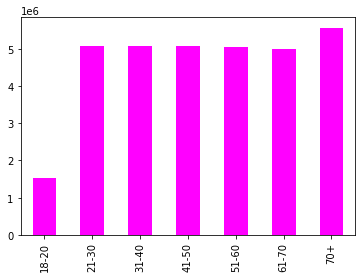

In [56]:
# Bar graph of age group variable
master_df['age_group'].value_counts().sort_index().plot.bar(color = 'magenta')

The laregest number of customers is in the 70 and older age group.

<AxesSubplot:>

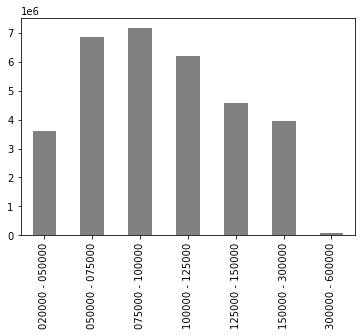

In [57]:
# Bar graph of income group variable
master_df['income_group'].value_counts().sort_index().plot.bar(color = 'grey')

The largest number of customers make between $75,000 and $100,000. 

<AxesSubplot:>

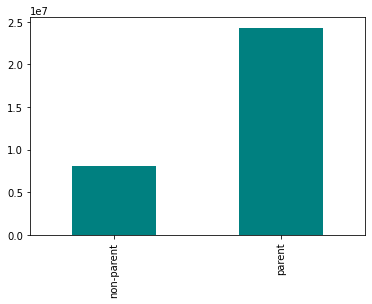

In [58]:
# Bar graph of parental status variable
master_df['parental_status'].value_counts().sort_index().plot.bar(color = 'teal')

Far more Instacart customers are parents than non-parents.

### 7.Customer Variable Aggregations

In [59]:
# Mean, min, max spending by age group
age_spend = master_df.groupby('age_group').agg({'order_avg': ['mean', 'min', 'max']})

In [60]:
age_spend

order_avg                
               mean  min        max
age_group                          
18-20      7.795420  1.3  14.900000
21-30      7.778480  1.0  16.700000
31-40      7.791972  1.0  18.233333
41-50      7.800554  1.1  20.114286
51-60      7.781191  1.0  20.000000
61-70      7.799392  1.1  23.200000
70+        7.792917  1.0  17.620000

In [61]:
# Mean, min, max number of orders by age
age_freq = master_df.groupby('age_group').agg({'max_order': ['mean', 'min', 'max']})

In [62]:
age_freq

max_order        
                mean min max
age_group                   
18-20      32.859001   3  99
21-30      32.854040   3  99
31-40      33.455966   3  99
41-50      33.071012   3  99
51-60      32.953947   3  99
61-70      33.008732   2  99
70+        33.032029   2  99

In [63]:
# Mean, min, max spending by income group
income_spend = master_df.groupby('income_group').agg({'order_avg': ['mean', 'min', 'max']})

In [64]:
income_spend

order_avg                     
                     mean       min        max
income_group                                  
020000 - 050000  6.696985  1.000000  13.878571
050000 - 075000  7.821895  1.100000  14.761905
075000 - 100000  7.962867  5.375000  23.200000
100000 - 125000  7.962165  5.283607  19.400000
125000 - 150000  7.966142  4.656522  20.000000
150000 - 300000  7.951950  4.370588  20.114286
300000 - 600000  7.753725  4.985714  10.321429

In [65]:
# Mean, min, max number of orders by income group
income_freq = master_df.groupby('income_group').agg({'max_order': ['mean', 'min', 'max']})

In [66]:
income_freq

max_order        
                      mean min max
income_group                      
020000 - 050000  30.521551   2  99
050000 - 075000  33.478391   3  99
075000 - 100000  33.387581   3  99
100000 - 125000  33.312005   2  99
125000 - 150000  33.010899   3  99
150000 - 300000  33.524995   2  99
300000 - 600000  38.143253   3  99

In [67]:
# Mean, min, max spending by parental status
parent_spend = master_df.groupby('parental_status').agg({'order_avg': ['mean', 'min', 'max']})

In [68]:
parent_spend

order_avg           
                     mean  min   max
parental_status                     
non-parent       7.789975  1.0  20.0
parent           7.791334  1.0  23.2

In [69]:
# Mean, min, max number of orders by parental status
parent_freq = master_df.groupby('parental_status').agg({'max_order': ['mean', 'min', 'max']})

In [70]:
parent_freq

max_order        
                      mean min max
parental_status                   
non-parent       33.299768   2  99
parent           32.970378   2  99

My notebook is getting a bit sluggish, so I am going to split it and do the second part on a second notebook.

In [94]:
master_df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'master_df_2.pkl'))